### 1. Load Titanic Dataset

In [1]:
import pandas as pd

train = pd.read_csv("data/titanic/train.csv", index_col="PassengerId")
print(train.shape)
print(train.info())
train.head()

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
import pandas as pd

test = pd.read_csv("data/titanic/test.csv", index_col="PassengerId")
print(test.shape)
print(test.info())
test.head()

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### 2. Data Preprocessing
- 문자열 데이터를 숫자로 변환
- One-Hot Encoding
- null data 처리

### 2.2 성별 encoding

In [4]:
# 성별 encoding
# male -> 0, female -> 1
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [5]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

train["Sex"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Sex, dtype: object

In [7]:
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

test["Sex"].head()

PassengerId
892    0
893    1
894    0
895    0
896    1
Name: Sex, dtype: object

### 2.2 Fare 컬럼의 null data 처리


In [8]:
test.loc[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [9]:
test.loc[test["Fare"].isnull(), "Fare"] = 0

test.loc[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### 2.3 Embarked 컬럼 처리
- One Hot Encoding

In [10]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [12]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 13)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


### 2.4 Age 컬럼 처리
* null 값을 전체 나이의 평균값을 계산해서 채워넣기

In [13]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [14]:
# Age 컬럼의 값이 null row를 평균 나이로 수정하기
train.loc[train['Age'].isnull(),'Age'] = mean_age
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  Embarked_C  891 non-null    bool   
 12  Embarked_S  891 non-null    bool   
 13  Embarked_Q  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [15]:
test_mean_age = test["Age"].mean()
test.loc[test["Age"].isnull(), "Age"] = test_mean_age
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex         418 non-null    object 
 3   Age         418 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Ticket      418 non-null    object 
 7   Fare        418 non-null    float64
 8   Cabin       91 non-null     object 
 9   Embarked    418 non-null    object 
 10  Embarked_C  418 non-null    bool   
 11  Embarked_S  418 non-null    bool   
 12  Embarked_Q  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3), object(5)
memory usage: 37.1+ KB


### 3. Data Visualization(시각화)
* countplot - 막대그래프 , x축이나 y축 중에서 하나만 설정할 수 있다.
* barplot - 막대그래프, x축, y축 둘다 설정할 수 있다.
* pointplot - 선그래프
* distplot - 히스토그램(분포도)
* lmplot - 산점도(scatter plot)

In [16]:
%matplotlib inline

import seaborn as sns

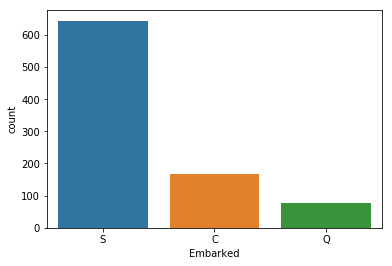

In [17]:
sns.countplot(data=train, x="Embarked")

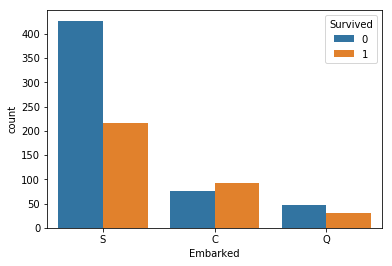

In [18]:
# 생존 여부와  Embarked 칼럼의 연관성 확인
sns.countplot(data=train, x="Embarked", hue="Survived")

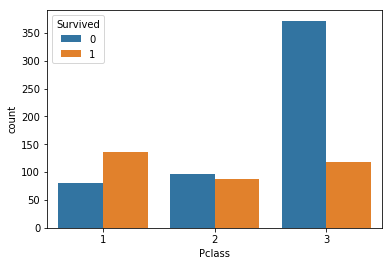

In [19]:
sns.countplot(data=train, x="Pclass", hue="Survived")

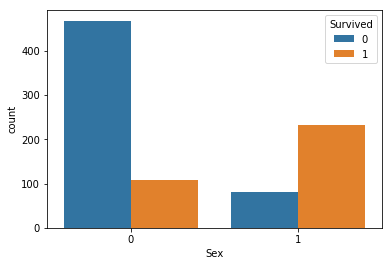

In [20]:
sns.countplot(data=train, x="Sex", hue="Survived")

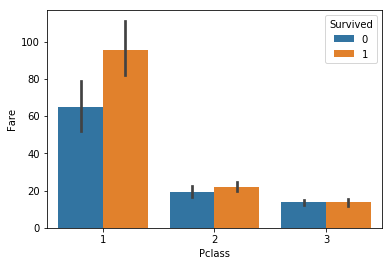

In [21]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

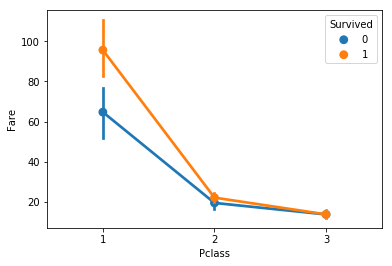

In [22]:
sns.pointplot(data=train, x="Pclass", y="Fare", hue="Survived")

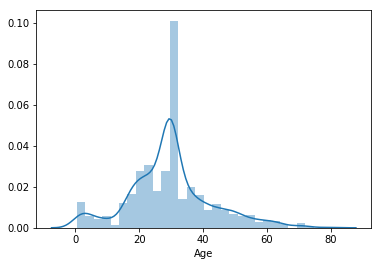

In [23]:
sns.distplot(train["Age"], hist=True)

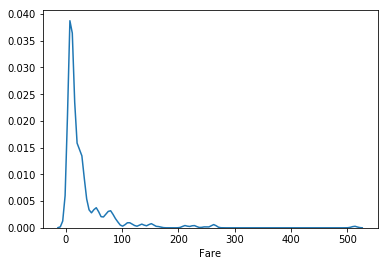

In [24]:
sns.distplot(train["Fare"], hist=False)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name Sex        Age  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris   0  22.000000   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.000000   
3                                       Heikkinen, Miss. Laina   1  26.000000   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.000000   
5                                     Allen, Mr. William Henry   0  35.000000   
...             

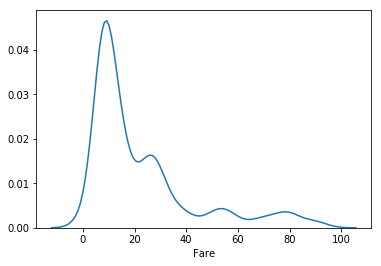

In [25]:
# 요금이 100달라보다 작은 데이터
low_fare = train.loc[train["Fare"] < 100]
print(low_fare)
sns.distplot(low_fare["Fare"], hist=False)

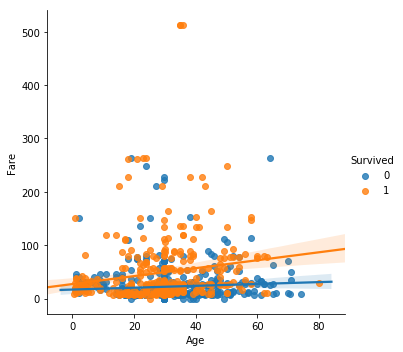

In [26]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived")

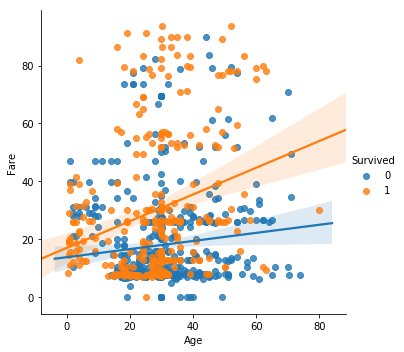

In [27]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived")